<a href="https://colab.research.google.com/github/nataliashalaeva/ml/blob/main/lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
ds = pd.read_csv('/AirQualityUCI.csv', sep=';')
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


In [7]:
for col in ["CO(GT)", "C6H6(GT)", "T", "RH", "AH"]:
    ds[col] = ds[col].str.replace(',', '.').astype(float)
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(15), object(2)
memory usage: 1.2+ MB


1. Базовая линейная регрессия с одним признаком. Предсказать уровень концентрации
оксида углерода (CO(GT)) на основе уровня концентрации бензола (C6H6(GT)) используя
простую линейную регрессию. Использовать метрики: R-квадрат, MSE.

1. Базовая линейная регрессия:
R-квадрат: 0.8720848581546516
MSE: 0.24964304923782724


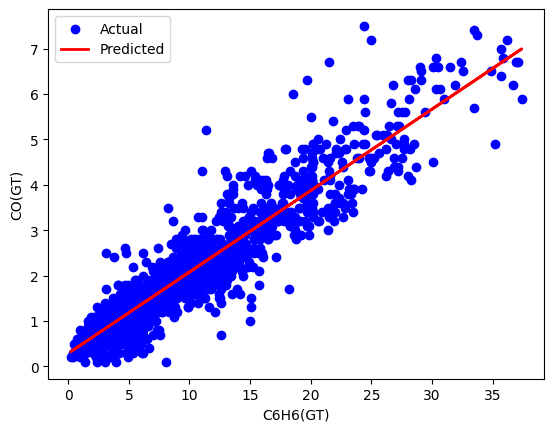

In [8]:

fds = ds[(ds['CO(GT)'] != -200) & (ds['C6H6(GT)'] != -200) & (ds['CO(GT)'].isna() == False) & (ds['C6H6(GT)'].isna() == False)]
y = fds['CO(GT)']
x = fds[['C6H6(GT)']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


model_1 = LinearRegression()
model_1.fit(x_train, y_train)
y_pred = model_1.predict(x_test)

r2_1 = r2_score(y_test, y_pred)
mse_1 = mean_squared_error(y_test, y_pred)

print("1. Базовая линейная регрессия:")
print(f'R-квадрат: {r2_1}')
print(f'MSE: {mse_1}')

plt.scatter(x_test, y_test, color='blue', label='Actual')
plt.plot(x_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel("C6H6(GT)")
plt.ylabel("CO(GT)")
plt.legend()
plt.show()


2. Множественная линейная регрессия. Предсказать уровень концентрации оксида
углерода (CO(GT)) на основе нескольких признаков (например, C6H6(GT), T, RH, NO2(GT)).
Использовать метрики: R-квадрат, MSE.

In [9]:

fds2 = fds[(fds['T'] != -200) & (fds['RH'] != -200) & (fds['NO2(GT)'] != -200) & (fds['T'].isna() == False) & (fds['RH'].isna() == False) & (fds['NO2(GT)'].isna() == False)]
x = fds2[['C6H6(GT)', 'T', 'RH', 'NO2(GT)']]
y = fds2['CO(GT)']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model_2 = LinearRegression()
model_2.fit(x_train, y_train)
y_pred = model_2.predict(x_test)

r2_2 = r2_score(y_test, y_pred)
mse_2 = mean_squared_error(y_test, y_pred)

print("R-квадрат:", r2_2)
print("MSE:", mse_2)


R-квадрат: 0.9038757238266725
MSE: 0.18149220398668106


3. Стандартизация признаков и линейная регрессия. Повторить задачу 2, но перед
обучением модели стандартизировать признаки, используя StandardScaler. Использовать
метрики: R-квадрат, MSE.

In [10]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

model_3 = LinearRegression()
model_3.fit(x_train_scaled, y_train)
y_pred_3 = model_3.predict(x_test_scaled)

r2_3 = r2_score(y_test, y_pred_3)
mse_3 = mean_squared_error(y_test, y_pred_3)

print(f'R-квадрат: {r2_3}')
print(f'MSE: {mse_3}')

R-квадрат: 0.9038757238266725
MSE: 0.18149220398668103


In [11]:

cds = ds.drop(columns=['Unnamed: 15', 'Unnamed: 16', 'Date', 'Time'])
cds = cds.dropna()
cds.info()


<class 'pandas.core.frame.DataFrame'>
Index: 9357 entries, 0 to 9356
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         9357 non-null   float64
 1   PT08.S1(CO)    9357 non-null   float64
 2   NMHC(GT)       9357 non-null   float64
 3   C6H6(GT)       9357 non-null   float64
 4   PT08.S2(NMHC)  9357 non-null   float64
 5   NOx(GT)        9357 non-null   float64
 6   PT08.S3(NOx)   9357 non-null   float64
 7   NO2(GT)        9357 non-null   float64
 8   PT08.S4(NO2)   9357 non-null   float64
 9   PT08.S5(O3)    9357 non-null   float64
 10  T              9357 non-null   float64
 11  RH             9357 non-null   float64
 12  AH             9357 non-null   float64
dtypes: float64(13)
memory usage: 1023.4 KB


4. Линейная регрессия с L1 регуляризацией (Lasso). Предсказать уровень концентрации
оксида углерода (CO(GT)) на основе всех доступных признаков, используя линейную
регрессию с L1 регуляризацией (Lasso). Подобрать оптимальный параметр регуляризации
(alpha) с помощью кросс-валидации. Использовать метрики: R-квадрат, MSE, также
оценить количество ненулевых коэффициентов.

In [12]:
x = cds.drop(columns=['CO(GT)'], axis = 1)
y = cds['CO(GT)']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

lasso_4 = LassoCV(cv=11)
lasso_4.fit(x_train_scaled, y_train)

model_4 = Lasso(alpha=lasso_4.alpha_)
model_4.fit(x_train_scaled, y_train)
y_pred_4 = model_4.predict(x_test_scaled)

r2_4 = r2_score(y_test, y_pred_4)
mse_4 = mean_squared_error(y_test, y_pred_4)
non_zero_coef = np.sum(model_4.coef_ != 0)

print(f'R-квадрат: {r2_4}')
print(f'MSE: {mse_4}')
print(f'Количество ненулевых коэффициентов: {non_zero_coef}')
print(f"Оптимальный alpha: {lasso_4.alpha_:.4f}")


R-квадрат: 0.5154535583418232
MSE: 2862.75892617906
Количество ненулевых коэффициентов: 11
Оптимальный alpha: 0.0516


5. Линейная регрессия с L2 регуляризацией (Ridge). Предсказать уровень концентрации
оксида углерода (CO(GT)) на основе всех доступных признаков, используя линейную
регрессию с L2 регуляризацией (Ridge). Подобрать оптимальный параметр регуляризации
(alpha) с помощью кросс-валидации. Использовать метрики: R-квадрат, MSE.

R-квадрат: 0.5153469799185606
MSE: 2863.388604381811
Оптимальный alpha: 10.0000


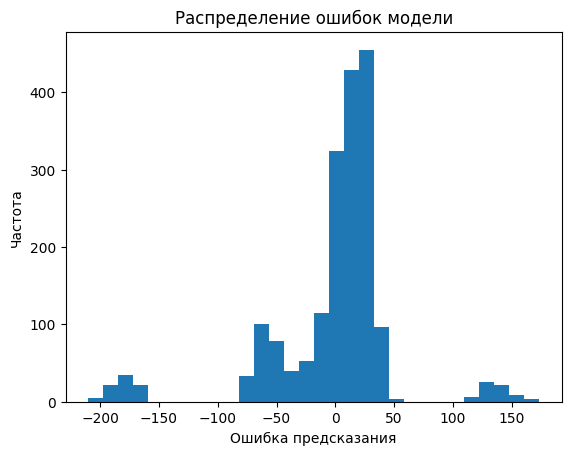

In [13]:
x = cds.drop(columns=['CO(GT)'], axis = 1)
y = cds['CO(GT)']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

ridge_cv = RidgeCV(cv=11)
ridge_cv.fit(x_train_scaled, y_train)

model_5 = Ridge(alpha=ridge_cv.alpha_)
model_5.fit(x_train_scaled, y_train)
y_pred_5 = model_5.predict(x_test_scaled)

r2_5 = r2_score(y_test, y_pred_5)
mse_5 = mean_squared_error(y_test, y_pred_5)

print(f'R-квадрат: {r2_5}')
print(f'MSE: {mse_5}')
print(f"Оптимальный alpha: {ridge_cv.alpha_:.4f}")

plt.hist(y_test - y_pred_4, bins=30)
plt.xlabel("Ошибка предсказания")
plt.ylabel("Частота")
plt.title("Распределение ошибок модели")
plt.show()

6. Кросс-валидация для оценки модели. Использовать K-fold кросс-валидацию
(например, с K=5 или K=10) для оценки производительности модели множественной
линейной регрессии (пункт 2). Использовать метрики: R-квадрат, MSE по всем фолдам

In [14]:
X = cds.drop(columns=['CO(GT)'])
y = cds['CO(GT)']

k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)


model = LinearRegression()
r2_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')
mse_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')

print(f'Средний R-квадрат: {np.mean(r2_scores):.4f}')
print(f'Средний MSE: {-np.mean(mse_scores):.4f}')
print(f'R-квадрат по фолдам: {r2_scores}')
print(f'MSE по фолдам: {mse_scores}')

Средний R-квадрат: 0.4703
Средний MSE: 3185.9916
R-квадрат по фолдам: [0.48408675 0.54594775 0.44080339 0.47859285 0.49439331 0.4774651
 0.38754833 0.49933667 0.45005611 0.44519335]
MSE по фолдам: [-2959.61221784 -2758.91576153 -3161.35945187 -3195.98997607
 -3357.69813892 -3219.58466727 -3438.20640455 -2651.85023551
 -3652.1430946  -3464.55635435]


7. Регуляризация с кросс-валидацией для выбора параметра alpha (Lasso или Ridge).
Использовать кросс-валидацию для выбора оптимального значения параметра
регуляризации alpha для Lasso или Ridge регрессии. Например, использовать RidgeCV или
LassoCV из scikit-learn. Использовать метрики: R-квадрат, MSE, оптимальное значение
alpha.

In [15]:
lasso = LassoCV(cv=kf)
lasso.fit(X, y)
y_pred_lasso = lasso.predict(X)
r2_lasso = lasso.score(X, y)
mse_lasso = np.mean((y - y_pred_lasso) ** 2)

print(f"Lasso Regression:")
print(f"Оптимальный alpha: {lasso.alpha_:.4f}")
print(f"R-квадрат: {r2_lasso:.4f}")
print(f"MSE: {mse_lasso:.4f}")
print(f"Количество ненулевых коэффициентов: {np.sum(lasso.coef_ != 0)}")
print("-" * 50)


ridge = RidgeCV(alphas=np.logspace(-4, 1, 50), cv=kf, scoring='r2')
ridge.fit(X, y)
y_pred_ridge = ridge.predict(X)
r2_ridge = ridge.score(X, y)
mse_ridge = np.mean((y - y_pred_ridge) ** 2)

print(f"Ridge Regression:")
print(f"Оптимальный alpha: {ridge.alpha_:.4f}")
print(f"R-квадрат: {r2_ridge:.4f}")
print(f"MSE: {mse_ridge:.4f}")

Lasso Regression:
Оптимальный alpha: 10.5235
R-квадрат: 0.4732
MSE: 3176.7067
Количество ненулевых коэффициентов: 10
--------------------------------------------------
Ridge Regression:
Оптимальный alpha: 10.0000
R-квадрат: 0.4737
MSE: 3173.8206


8. Полиномиальная регрессия. Создать полиномиальные признаки (например, до степени
2 или 3) из исходных признаков и использовать их для обучения линейной регрессии.
Сравнить производительность с обычной линейной регрессией. Использовать метрики: Rквадрат, MSE.

In [16]:
x = fds2[['C6H6(GT)', 'T']]
y = fds2['CO(GT)']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model_8 = LinearRegression()
model_8.fit(X_train_poly, y_train)
y_pred_8 = model_8.predict(X_test_poly)

r2_8 = r2_score(y_test, y_pred_8)
mse_8 = mean_squared_error(y_test, y_pred_8)

print(f'R-квадрат: {r2_8}')
print(f'MSE: {mse_8}')

R-квадрат: 0.8989291668308254
MSE: 0.19083179609662035


9. Сравнение моделей и интерпретация результатов. Сравнить производительность всех
построенных моделей (простая линейная регрессия, множественная линейная регрессия,
Lasso, Ridge, полиномиальная регрессия). Проанализировать коэффициенты моделей и
сделать выводы о важности различных признаков для прогнозирования CO(GT).

In [17]:
print("Результаты моделей:")
print("1. Базовая линейная регрессия:")
print(f'R-квадрат: {r2_1}')
print(f'MSE: {mse_1}')
print("-" * 50)
print("2. Множественная линейная регрессия:")
print(f'R-квадрат: {r2_2}')
print(f'MSE: {mse_2}')
print("-" * 50)
print("3. Стандартизация признаков и линейная регрессия:")
print(f'R-квадрат: {r2_3}')
print(f'MSE: {mse_3}')
print("-" * 50)
print("4. LASSO-регрессия:")
print(f'R-квадрат: {r2_4}')
print(f'MSE: {mse_4}')
print(f'Количество ненулевых коэффициентов: {non_zero_coef}')
print("-" * 50)
print("5. Ridge-регрессия:")
print(f'R-квадрат: {r2_5}')
print(f'MSE: {mse_5}')
print("-" * 50)
print("6. Кросс-валидация для оценки модели:")
print(f'Средний R-квадрат: {np.mean(r2_scores):.4f}')
print(f'Средний MSE: {-np.mean(mse_scores):.4f}')
print(f'R-квадрат по фолдам: {r2_scores}')
print(f'MSE по фолдам: {mse_scores}')
print("-" * 50)
print("7. Регуляризация с кросс-валидацией для выбора параметра alpha (Lasso или Ridge):")
print(f"Lasso Regression:")
print(f"Оптимальный alpha: {lasso.alpha_:.4f}")
print(f"R-квадрат: {r2_lasso:.4f}")
print(f"MSE: {mse_lasso:.4f}")
print(f"Количество ненулевых коэффициентов: {np.sum(lasso.coef_ != 0)}")
print("-" * 50)
print(f"Ridge Regression:")
print(f"Оптимальный alpha: {ridge.alpha_:.4f}")
print(f"R-квадрат: {r2_ridge:.4f}")
print(f"MSE: {mse_ridge:.4f}")
print("-" * 50)
print("8. Полиномиальная регрессия:")
print(f'R-квадрат: {r2_8}')
print(f'MSE: {mse_8}')
print("-" * 50)



Результаты моделей:
1. Базовая линейная регрессия:
R-квадрат: 0.8720848581546516
MSE: 0.24964304923782724
--------------------------------------------------
2. Множественная линейная регрессия:
R-квадрат: 0.9038757238266725
MSE: 0.18149220398668106
--------------------------------------------------
3. Стандартизация признаков и линейная регрессия:
R-квадрат: 0.9038757238266725
MSE: 0.18149220398668103
--------------------------------------------------
4. LASSO-регрессия:
R-квадрат: 0.5154535583418232
MSE: 2862.75892617906
Количество ненулевых коэффициентов: 11
--------------------------------------------------
5. Ridge-регрессия:
R-квадрат: 0.5153469799185606
MSE: 2863.388604381811
--------------------------------------------------
6. Кросс-валидация для оценки модели:
Средний R-квадрат: 0.4703
Средний MSE: 3185.9916
R-квадрат по фолдам: [0.48408675 0.54594775 0.44080339 0.47859285 0.49439331 0.4774651
 0.38754833 0.49933667 0.45005611 0.44519335]
MSE по фолдам: [-2959.61221784 -2758.9

Вывод:
Лучшая модель — множественная линейная регрессия (R² = 0.9039), поскольку она использует все доступные признаки и показывает наилучший баланс качества и простоты.
Полиномиальная регрессия может быть полезной, но увеличивает сложность модели и риск переобучения.
Lasso-регрессия показала, что можно использовать 10–11 признаков из 12, так как некоторые коэффициенты обнулились.

Ключевые факторы, влияющие на CO(GT):
C6H6(GT) (бензол) — главный предиктор.
PT08.S1(CO), NOx(GT), NO2(GT) — индикаторы загрязнения.
T, RH, AH — погодные условия также вносят вклад.